In [29]:
import pathlib
import csv

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [2]:
def get_structures(path):
    C = []
    R = []
    F = []
    H = {}
    
    conditions = pathlib.Path(path).glob("*")
    for cond_i, condition in enumerate(conditions):
        c = str(condition).split("__")[0].split("/")[-1]
#         if c[0] != 'C': continue
        if 'C' not in c: continue # HACK! the previous line only works when there are no prefix on the cond names
        C.append(c)
        if cond_i == 0:
            replicates = condition.glob("*")
            for rep_i, replicate in enumerate(replicates):
                r = str(replicate).split("/")[-1]
                R.append(r)
                if rep_i == 0:
                    files = replicate.glob("*")
                    for file in files:
                        f = str(file).split("/")[-1].split(".")[0]
                        F.append(f)

                        with open(file, 'r') as dataFile:
                            csvReader = csv.reader(dataFile)
                            for row_i, row_d in enumerate(csvReader):
                                if row_i == 0:
                                    H[f] = row_d
                                    break
    return sorted(C),sorted(R),sorted(F),H


# C,R,F,H = get_structures("../Data/fitness_fns")
# print(C)
# print(R)
# print(F)
# print(H)

In [3]:
def get_data(path,cond,rep,file,column, no_cast=False): 
    data = []
    key = None
    
    files = pathlib.Path(path).glob("*{}*/{}/{}.csv".format(cond,rep,file)) # added * on front to be compatable
    files = [str(f) for f in files]
    if len(files) == 0:                                                           # with named jobs
#         print("ERROR: missing file at {} {} {} {}".format(path,cond,rep,file))
        return None
    file = files[0]                                       
    with open(file, 'r') as dataFile:
        csvReader = csv.reader(dataFile)
        for row_i, row_d in enumerate(csvReader):
            if row_i == 0:
                try:
                    key = row_d.index(column)
                except:
#                     print("ERROR: column \"{}\" doesn't exist in {}".format(column, file))
                    return None
                continue
            data.append(row_d[key])
    if no_cast:
        return data
    else:
        return list(map(float, data))

# test_x = get_data("../Data/fitness_fns","C00","101","pop","update")
# test_y = get_data("../Data/fitness_fns","C00","101","pop","score_AVE")

main_exp_C00
main_exp_C01
main_exp_C02
main_exp_C03
main_exp_C04
main_exp_C05
main_exp_C06
main_exp_C07
main_exp_C08
main_exp_C09
main_exp_C10
main_exp_C11
main_exp_C12
main_exp_C13
main_exp_C14
main_exp_C15
main_exp_C16
main_exp_C17
main_exp_C18
main_exp_C19
main_exp_C20
main_exp_C21
main_exp_C22
main_exp_C23
main_exp_C24
main_exp_C25
main_exp_C26
main_exp_C27
main_exp_C28
main_exp_C29
plotting


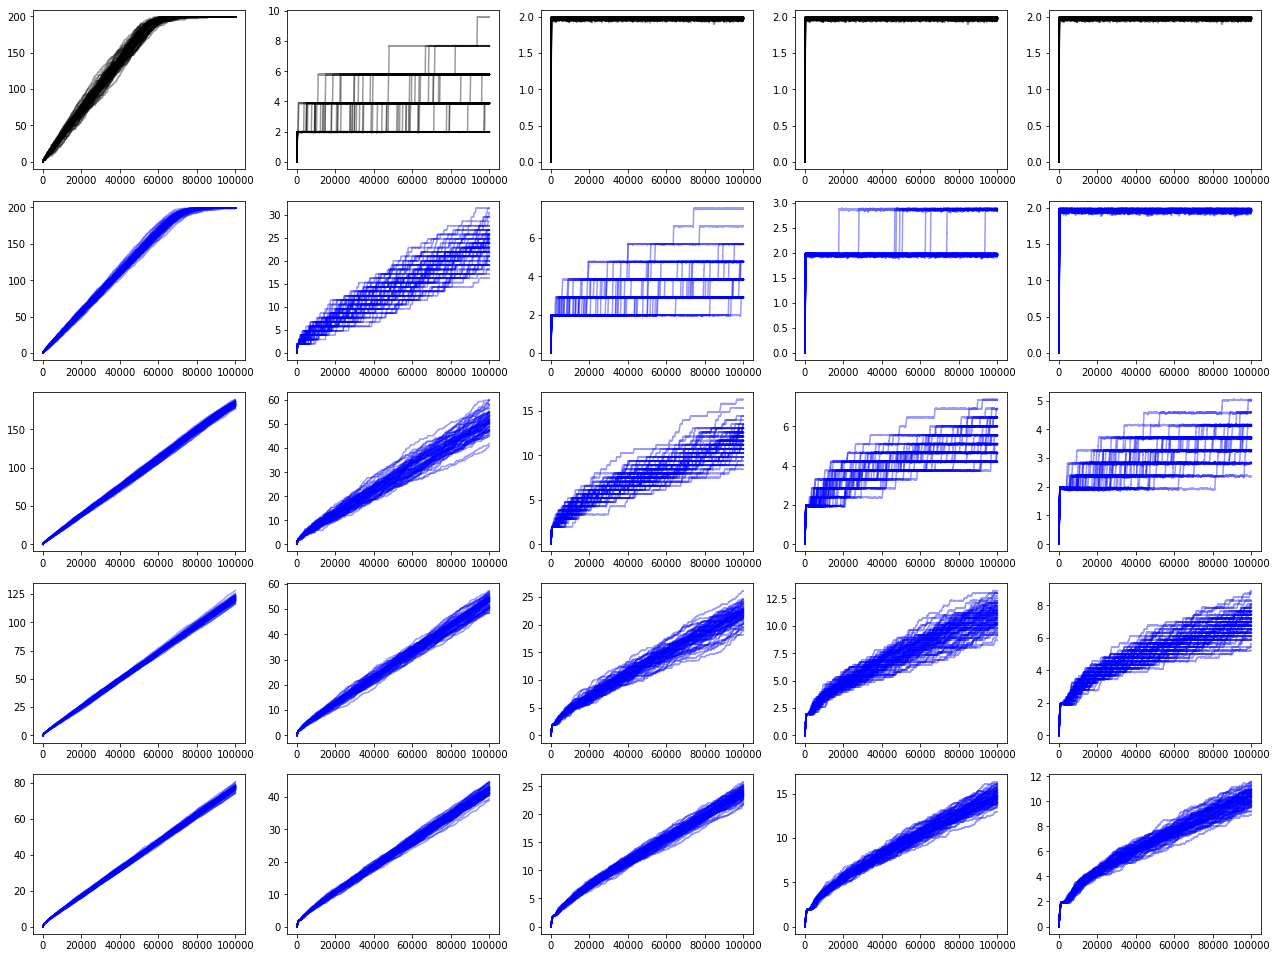

In [18]:
'''
Data here ranges from 0.5 to 2.5 by 0.5n in Lb. Ranges from 1 to 16 traits by 2^n.
'''
C,R,_,_ = get_structures("../Data/main_exponential_exp")


fig, axs = plt.subplots(5,5)
fig.set_size_inches(22, 17)


# fx = [0,100000]
# fy = [0,255]
# for i in range(5):
#     for j in range(5):
#         axs[i][j].scatter(fx,fy,alpha=0)

a = 0.4
for ci, c in enumerate(C):
    print(c)
    for r in R:
        x = get_data("../Data/main_exponential_exp",c,r,"pop","update")
        y = get_data("../Data/main_exponential_exp",c,r,"pop","score_AVE")
        if not y is None:
            if ci < 6:
                if ci == 2: continue
                if ci < 2:
                    ct = ci
                else:
                    ct = ci -1
                axs[0][ct].plot(x,y,color='black',alpha=a)
            elif ci < 10:
                axs[ci-5][0].plot(x,y,color='blue',alpha=a)
            elif ci < 14:
                axs[ci-9][1].plot(x,y,color='blue',alpha=a)
            elif ci < 18:
                pass
            elif ci < 22:
                axs[ci-17][2].plot(x,y,color='blue',alpha=a)
            elif ci < 26:
                axs[ci-21][3].plot(x,y,color='blue',alpha=a)
            else:
                axs[ci-25][4].plot(x,y,color='blue',alpha=a)

                
print("plotting")
# plt.savefig("./BEACON_2.png")
plt.show()

COND main_exp_C06
193.8
2


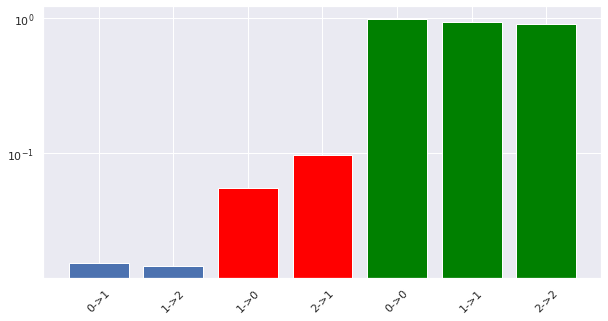

[[0.9843538655450398, 0.015505864294631463, 0.00014027016032879325], [0.05554759995417574, 0.92974567533509, 0.014706724710734335], [0.002347528052960233, 0.09737546363679048, 0.9002770083102493]]


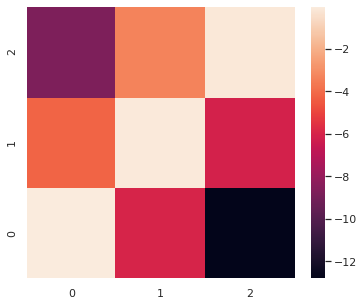

COND main_exp_C07
COND main_exp_C08
COND main_exp_C09
COND main_exp_C10
COND main_exp_C11
COND main_exp_C12
COND main_exp_C13
COND main_exp_C14
COND main_exp_C15
COND main_exp_C16
COND main_exp_C17
COND main_exp_C18
COND main_exp_C19
COND main_exp_C20
COND main_exp_C21
COND main_exp_C22
COND main_exp_C23
COND main_exp_C24
COND main_exp_C25
COND main_exp_C26
COND main_exp_C27
COND main_exp_C28
COND main_exp_C29


In [55]:


def Fa(x):
    return x

def Fb(x):
    return -0.1*x

def C(x, la, lb):
    ca = 0
    cb = 0
    while x >= la+lb:
        ca += 1
        cb += 1
        x -= la+lb
    if x >= la:
        ca += 1
        x -= la
    return ca, cb, x

def F(x):
    la = 2
    lb = 0.5
    ca, cb, d = C(x, la, lb)
    if ca == cb:
        return Fa(ca*la + d) + Fb(cb*lb)
    else:
        return Fa(ca*la) + Fb(cb*lb + d)

Cm,Rm,_,_ = get_structures("../Data/main_exponential_exp")

la = 2
GENS = 100000

lbh = [0.5,1.0,1.5,2.0,2.5]
numtaskh=[2,4,8,16]

for ci, c in enumerate(Cm):
    if ci < 6: continue
    print("COND", c)
#     if ci not in [6]: continue
    if ci < 10:
        z = (255*(la-(0.1*lb)))/(la+lbh[0])
        lb = lbh[0]
        numtasks = numtaskh[ci-6]
    elif ci < 14:
        z = (255*(la-(0.1*lb)))/(la+lbh[1])
        lb = lbh[1]
        numtasks = numtaskh[ci-10]
    elif ci < 18:
        continue
    elif ci < 22:
        z = (255*(la-(0.1*lb)))/(la+lbh[2])
        lb = lbh[2]
        numtasks = numtaskh[ci-18]
    elif ci < 26:
        z = (255*(la-(0.1*lb)))/(la+lbh[3])
        lb = lbh[3]
        numtasks = numtaskh[ci-22]
    elif ci < 30:
        z = (255*(la-(0.1*lb)))/(la+lbh[4])
        lb = lbh[4]
        numtasks = numtaskh[ci-26]
    else: continue
    print(z)
    print(numtasks)
    

    holds_all_reps = []
    for r in Rm:
        allNames = []
        names = []
        ty = get_data("../Data/main_exponential_exp",c,r,"pop","mean_AVE")
        ascent_counts = [0 for _ in range(len(ty))] #hard coded to generations
        for name in ["A::", "B::", "C::", "D::", "E::", "F::","G::","H::","I::","J::","K::","L::","M::","N::","O::","P::","Q::","R::","S::","T::","U::","V::","W::","X::","Y::","Z::"]:
            y = get_data("../Data/main_exponential_exp",c,r,"pop",name+"mean_AVE")
            if not y is None:
                names.append(name)
                allNames.append(y)
            
        test = zip(*allNames) #nicely puts each update side-by-side so all traits are together in one line
        for u, update in enumerate(test):
            l =  len(update)
            for i in range(l):
                ca, cb, d = C(update[i], la, lb)
#                 if ca == cb and d > 0.5 and update[i] < z-10:# threshold and pre-max gens only
                if ca == cb and 0.3 < d < 1.7 and update[i] < z-10:
                    ascent_counts[u] += 1
        transition_counts = {}      
        for h in range(1,len(ascent_counts)):
            prev = ascent_counts[h-1]
            curr = ascent_counts[h]
            key = str(prev)+"->"+str(curr)
            if not key in transition_counts:
                transition_counts[key] = 1
            else:
                transition_counts[key] += 1
                
        holds_all_reps.append(transition_counts)
    cond_average_transitions = {}
    for rep_data in holds_all_reps:
        for key in rep_data:
            if key in cond_average_transitions:
                cond_average_transitions[key] += rep_data[key]
            else:
                cond_average_transitions[key] = rep_data[key]
    
    for key in cond_average_transitions:
            cond_average_transitions[key] /= len(Rm)
            
    for s in range(17): #NORMALIZATION LOOP
        ssum = 0
        for key in cond_average_transitions:
            state = key.split("->")[0]
            if int(state) == s:
                ssum += cond_average_transitions[key]
        for key in cond_average_transitions:
            state = key.split("->")[0]
            if int(state) == s:
                cond_average_transitions[key] /= ssum
            
    plot_names = []
    plot_data = []
    for key in sorted(cond_average_transitions, key=lambda x: int(x.split("->")[0])):
        if key in ["0->1","1->2","2->3","3->4","4->5","5->6","6->7","7->8","8->9","9->10","10->11","11->12","12->13","13->14","14->15","15->16"]:
            plot_data.append(cond_average_transitions[key])
            plot_names.append(key)
    plt.figure(figsize=(10,5))
    plt.bar(plot_names,plot_data)

    
    plot_names = []
    plot_data = []
    for key in sorted(cond_average_transitions, key=lambda x: int(x.split("->")[0])):
        if key in ["1->0","2->1","3->2","4->3","5->4","6->5","7->6","8->7","9->8","10->9","11->10","12->11","13->12","14->13","15->14","16->15"]:
            plot_data.append(cond_average_transitions[key])
            plot_names.append(key)
    plt.bar(plot_names,plot_data, color="red")

    
    plot_names = []
    plot_data = []
    for key in sorted(cond_average_transitions, key=lambda x: int(x.split("->")[0])):
        if key in ["0->0","1->1","2->2","3->3","4->4","5->5","6->6","7->7","8->8","9->9","10->10","11->11","12->12","13->13","14->14","15->15","16->16"]:
            plot_data.append(cond_average_transitions[key])
            plot_names.append(key)
    plt.bar(plot_names,plot_data, color="green")
    
    
    
    
    plt.xticks(rotation=45)
    plt.yscale("log")
#     plt.savefig("pop_66_norm_{}.png".format(c))
    plt.show()
    
    
    M = [[0 for _ in range(numtasks+1)] for _ in range(numtasks+1)]
    Mlog = [[0 for _ in range(numtasks+1)] for _ in range(numtasks+1)]

    for key in cond_average_transitions:
        [From,To] = key.split("->")
        M[int(From)][int(To)] = cond_average_transitions[key]
        Mlog[int(From)][int(To)] = np.log2(cond_average_transitions[key])
    print(M)
    
    
    
    
#     with open("pop_66_markov_{}.csv".format(c), 'w') as outputFile:
#         for row in M:
#             outputFile.write(",".join(map(str,row)) + "\n")
                
    
    plt.figure(figsize=(6,5))
    ax = sns.heatmap(Mlog)
    ax.set_ylim([0,numtasks+1]) # fixes seaborn axes
#     plt.savefig("pop_66_matrix_{}.png".format(c))
    plt.show()